In [1]:
from codes.section1 import *
%matplotlib inline

## 1-1. 大雑把な分類

機械学習の方法の目的は **経験やデータから、背後の構造を学習し、未知の状況を予測すること** です。これが達成されれば世の中の様々な仕事を自動化できるようになりますが、経験の与え方にも色々有りえます。まずはじめに経験の要素に注目して、機械学習の方法を分類してみましょう。

### 教師あり学習
有名なアヤメのデータセットを見てみましょう。

In [2]:
iris = load_iris() # アヤメデータ読み込み
get_and_show_iris_data(iris)

,がく片の厚さ(cm),花びらの長さ(cm),"花の種類(0:setosa種, 1:versicolor種, 2:virginica種)"
0,3.5,1.4,0
1,3.0,1.6,0
2,3.2,4.7,1
3,3.0,4.4,1
4,3.3,6.0,2
5,3.2,6.0,2


説明のために、${\bf x}=$(がく片の厚さ(cm), 花びらの長さ(cm)), $y =$花の種類 とします。

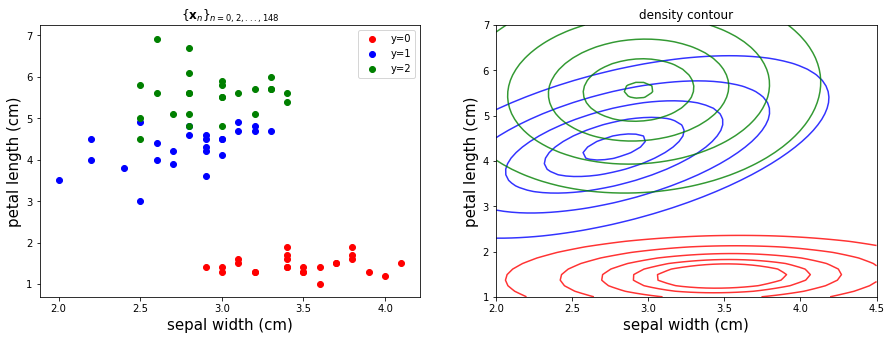

In [3]:
x, y = get_data_with_supervision(iris)
models = return_densitylist_trained_by(x, y)

それぞれ、
- （左側）半分のデータ $\{ {\bf x}_n, y_n\}_{n=0,2,...,148}$ の${\bf x}$の散布図。色の違いは $y_n$ の値の違い。
- （右側）データ $\{ {\bf x}_n, y_n\}_{n=0,2,...,148}$ から予想した、${\bf x}$が$y$に分類される確率 $p(y|{\bf x})$ 

を示しています。ちなみに実際に得た $p(y|{\bf x})$ を未知のデータと重ねて描いてみると：

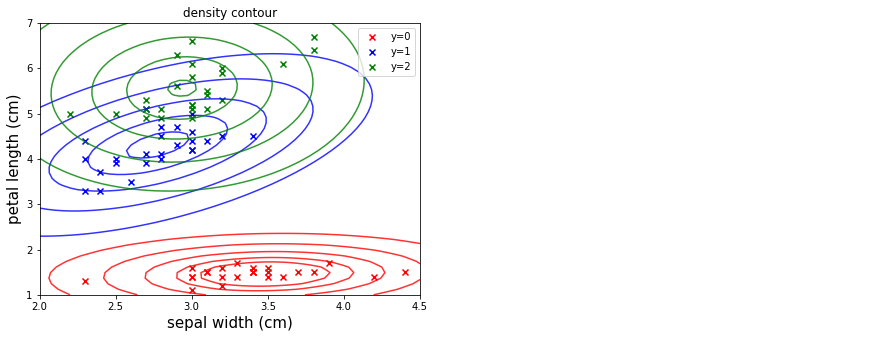

In [4]:
x_new, y_new = get_data_with_supervision(iris, offset=1)
plot_data_and_densitylist(x_new, y_new, models)

のようになり、実際に得た $p(y|{\bf x})$ を用いて知らないデータの振る舞いが予言できるようになっています。このように、

$$
\{ {\bf x}_n, y_n\}_{n=1,2,...,N}
\to
p(y|{\bf x})
$$

を機械学習で得る手法を**教師あり学習**といいます。

### 教師なし学習
同じデータを使って教師なし学習を説明してみます。教師なし学習で与えられるデータ形式は

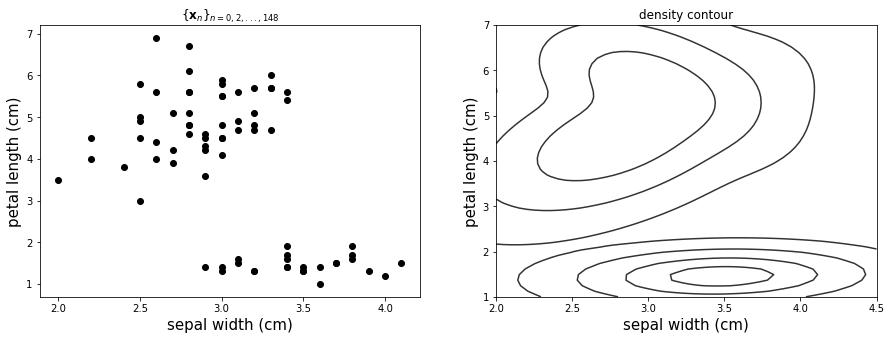

In [5]:
x = get_data_wo_supervision(iris)
model = return_density_trained_by(x)

それぞれ、
- （左側）半分のデータ $\{ {\bf x}_n\}_{n=0,2,...,148}$ の${\bf x}$の散布図。
- （右側）データ $\{ {\bf x}_n\}_{n=0,2,...,148}$ から予想した、${\bf x}$が出現する確率 $p({\bf x})$ 

を示しています。ちなみに実際に得た $p({\bf x})$ を未知のデータと重ねて描いてみると：

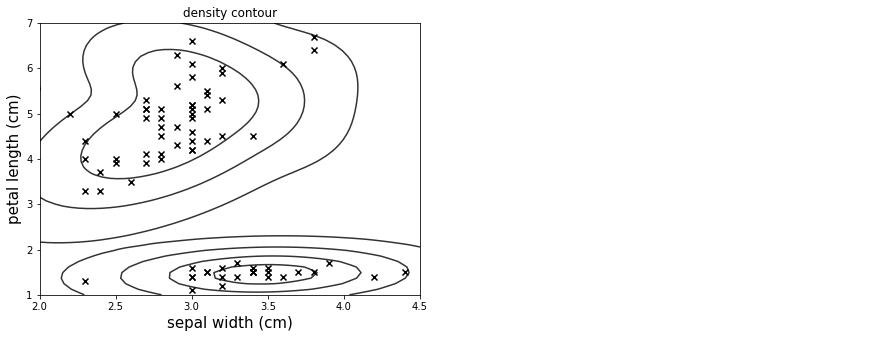

In [6]:
x_new = get_data_wo_supervision(iris, offset=1)
plot_data_and_density(x_new, model)

のようになり、実際に得た $p({\bf x})$ を用いて知らないデータの振る舞いが予言できるようになっています。このように、

$$
\{ {\bf x}_n\}_{n=1,2,...,N}
\to
p({\bf x})
$$

を機械学習で得る手法を**教師なし学習**といいます。

> 【補足】確率分布 $p({\bf x})$ を見つけるのではなく、単に塊を見つける**クラスタリング** や **主成分分析** などの手法も、正解シグナルが与えられないときに使うため、教師なし学習と呼ばれます。

### 強化学習
強化学習ではデータすら与えられません。代わりに「環境」が与えられ、 エージェント(=学習者、学習機)はその環境とのやり取りを通じて、最適な行動を探索し ます：

/Users/akinoritanaka/Documents/repository/meiji_draft/section1/codes/RLmaze/env.py:155: RuntimeWarning: invalid value encountered in true_divide
  vt = np.transpose(vnoed/(vnoed_maxs), (1,0,2))


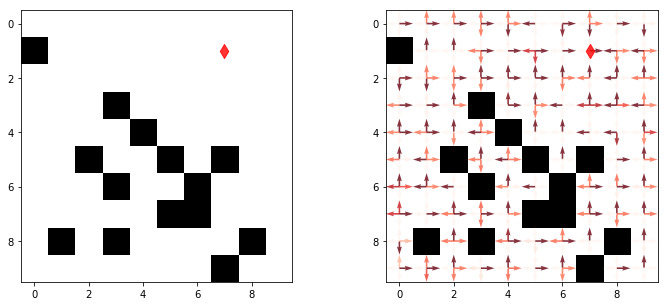

In [8]:
run_RL(size=10, T=2000)

- （左側）ランダムに生成された迷路の迷路
- （右側）ある強化学習エージェントに迷路を解かせた答え

強化学習ではデータの代わりに、エージェントが環境と相互作用することが許されています。特に**状態** $s$ における、エージェントの**行動** $a$ に応じて環境から**報酬** $r$ と呼ばれるスカラー量が支払われ、学習エージェントはこの報酬をなるべく多くもらえるような行動のための**方策** $\pi(a|s)$ を学習します：

$$
environment \to \pi(a|s)
$$

強化学習で有名なのはAlphaGo[論文] でしょう。AlphaGo の論文を眺めてみると、教師あり学習と強化学習に加え、 モンテカルロ木探索と呼ばれる手の探索手法も使われており、これらの方法の組み合わせで実現した結果であることがわかります。このように様々な手法を組み合わせても良いわけ です。